In [25]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from scipy.spatial import distance
import time
import matplotlib.pyplot as plt

IDS

Reached the goal


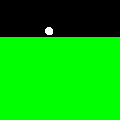

1
the total time was 222.0 ms
Reached the goal


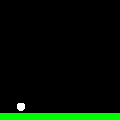

1
the total time was 2849.0 ms
Reached the goal


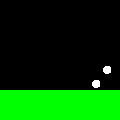

2
the total time was 1725.0 ms
Reached the goal


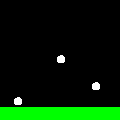

3
the total time was 1654.0 ms
Reached the goal


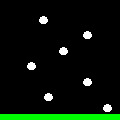

7
the total time was 1877.0 ms


In [20]:
def iterative_deepening_search(image,start,goal_condition):
  start_time = time.time()
  found_cricle = False
  circles = 0
  count = 1
  blank_image = np.zeros((120,120,3), np.uint8)
  blank_image[:,:] = (0,255,0)
  i = start[0]
  j = start[1]
  found = False   #found the circle
  end = False   #True when all the circles are found
  search_row = True  #False when Find a white pixel
  count = 120     #the layers it has to check (increases gradually)


  for x in range(count):    #from layer 0 to 120
    found = False   #the new row has no white pixels yet
    search_row = True #we have to check for white pixels
    circles = 0       #the amount of circles will reset until reaching the end
    for row in range(i,x):
      if found == True and search_row == True: #found a circle but the last row is all black(circle is finished)
        circles += 1
        found = False #looking for the new circle
        if (circles == goal_condition): #found all the circles
          end = True
      else:
        search_row = True
      for col in range(j,120):
        k = image[row,col]
        if k == 255:
          blank_image[row,col] = 255
          found = True
          search_row = False
        else:
          blank_image[row,col] = 0
    if end == True:
      print("Reached the goal")
      break
    if (x == count - 1):
      print("couldn't meet the goal") #did all the 120 search but couldn't meet the goal
  cv2_imshow(blank_image)
  end_time = time.time()
  print(circles)
  print(f"the total time was {np.ceil((end_time - start_time) * 10**3)} ms")


image = cv2.imread('circles_image1.png',cv2.IMREAD_GRAYSCALE)
iterative_deepening_search(image,[0,0],1)
image = cv2.imread('circles_image2.png',cv2.IMREAD_GRAYSCALE)
iterative_deepening_search(image,[0,0],1)
image = cv2.imread('circles_image3.png',cv2.IMREAD_GRAYSCALE)
iterative_deepening_search(image,[0,0],2)
image = cv2.imread('circles_image4.png',cv2.IMREAD_GRAYSCALE)
iterative_deepening_search(image,[0,0],3)
image = cv2.imread('circles_image5.png',cv2.IMREAD_GRAYSCALE)
iterative_deepening_search(image,[0,0],7)

At first,it starts to search the whole picture from the start point and start to search each row from row 0 to row 120 until it can find all the circles,because we only have information about the number of circles and not the locations of them we have to check each row to find the goal(it will be a complete algorithm if we do it from the (0,0) intial point)

In [3]:
def find_circle_center(points):  #a function to estimate the center point of a circle by having all the points as the input
    points = np.array(points)
    x = points[:, 0]
    y = points[:, 1]

    A = np.c_[-2*x, -2*y, np.ones(len(points))]
    b = -(x**2 + y**2)

    result = np.linalg.lstsq(A, b, rcond=None)
    h, k, _ = result[0]
    return [np.ceil(h),np.ceil(k)] #returns the coordinate of the center point (will round it up)


In [21]:
def find_all_circles_center(image):  #find all the circle point in a picture
  circle_points = [] #points of one circle
  centers = [] #center of all circles
  rows,cols = image.shape
  found = False
  search_row = True
  for i in range(rows):
    if (found == True and search_row == True):
      centers.append(find_circle_center(circle_points))
      circle_points = []
      found = False
    else:
      search_row = True
    for j in range(cols):
      k = image[i,j]
      if k == 255:
        circle_points.append([i,j])
        found = True
        search_row = False
  return centers
image = cv2.imread('circles_image3.png',cv2.IMREAD_GRAYSCALE)

In [22]:
def best_move(start,goal): #it will try all the 9 moves possible(including staying at the same place if reached the goal) and return the best possibe move
  i,j = start[0],start[1]
  distances = []
  if distance.euclidean(start,goal) == 0:
    return start #if we reached our goal,return the current location

  moves = [[i + 1 ,j],[i - 1 ,j],[i,j + 1],[i,j - 1],[i + 1,j + 1],[i + 1 ,j - 1],[i - 1,j + 1],[i - 1,j - 1]] #list of available moves
  distances.append(distance.euclidean(moves[0],goal))
  distances.append(distance.euclidean(moves[1],goal))
  distances.append(distance.euclidean(moves[2],goal))
  distances.append(distance.euclidean(moves[3],goal))
  distances.append(distance.euclidean(moves[4],goal))
  distances.append(distance.euclidean(moves[5],goal))
  distances.append(distance.euclidean(moves[6],goal))
  distances.append(distance.euclidean(moves[7],goal))
  return moves[distances.index(min(distances))]



the total time was 7.0 ms


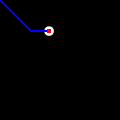

the total time was 37.0 ms


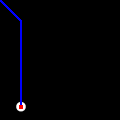

the total time was 18.0 ms


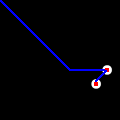

the total time was 42.0 ms


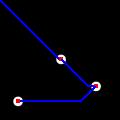

the total time was 42.0 ms


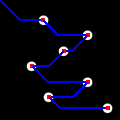

In [48]:
def A_Star_Search(image,start,goal,hueristic):
  start_time = time.time()
  end = False
  current_point = start
  image_3dimension = np.stack([image] * 3, axis=0)
  blank_image = np.transpose(image_3dimension, (1, 2, 0))
  circles_found = 0
  for circle in hueristic:
    while end != True:
      if (current_point == best_move(current_point,circle)):
        circles_found += 1
        blank_image[current_point[0] - 2:current_point[0] + 2,current_point[1] - 2:current_point[1] + 2] = (0,0,255)
        break
        if (circles_found == goal):
          print("all circles found")
          end = True
          break
      else:
        current_point = best_move(current_point,circle)
        blank_image[current_point[0]-1:current_point[0] + 1,current_point[1]-1:current_point[1]+1] = (255,0,0)
  end_time = time.time()
  print(f"the total time was {np.ceil((end_time - start_time) * 10**3)} ms")
  cv2_imshow(blank_image)


image = cv2.imread('circles_image1.png',cv2.IMREAD_GRAYSCALE)
A_Star_Search(image,[0,0],len(find_all_circles_center(image)),find_all_circles_center(image))
image = cv2.imread('circles_image2.png',cv2.IMREAD_GRAYSCALE)
A_Star_Search(image,[0,0],len(find_all_circles_center(image)),find_all_circles_center(image))
image = cv2.imread('circles_image3.png',cv2.IMREAD_GRAYSCALE)
A_Star_Search(image,[0,0],len(find_all_circles_center(image)),find_all_circles_center(image))
image = cv2.imread('circles_image4.png',cv2.IMREAD_GRAYSCALE)
A_Star_Search(image,[0,0],len(find_all_circles_center(image)),find_all_circles_center(image))
image = cv2.imread('circles_image5.png',cv2.IMREAD_GRAYSCALE)
A_Star_Search(image,[0,0],len(find_all_circles_center(image)),find_all_circles_center(image))





## <font color='red'>As it has been shown on the file the A* algorithm is significantly faster and more accurate it is mostly because it knows its goal and from the start only goes to the pixels closer to the gaol unlike the IDS where the algorithm has to search every possible node and pixel to find a goal</font>

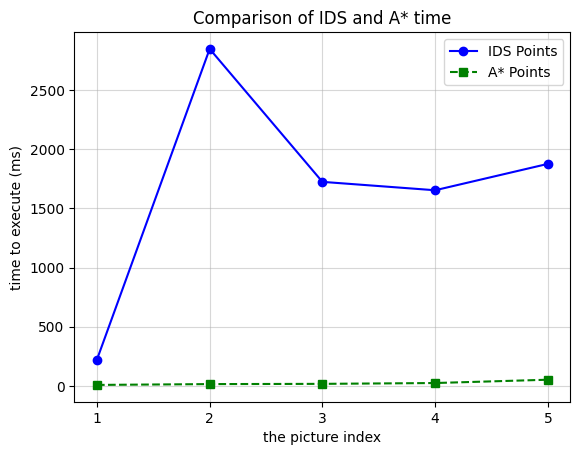

In [52]:

IDS_ypoints = np.array([222,2849,1725, 1654 , 1877])
A_star_ypoints = np.array([8,15,17,24,52])
plt.plot(IDS_ypoints, label="IDS Points", color="blue", linestyle="-", marker="o")
plt.plot(A_star_ypoints, label="A* Points", color="green", linestyle="--", marker="s")

x_ticks = np.arange(1, len(IDS_ypoints) + 1)
plt.xticks(ticks=np.arange(len(IDS_ypoints)), labels=x_ticks)

plt.xlabel("the picture index")
plt.ylabel("time to execute (ms)")
plt.title("Comparison of IDS and A* time")
plt.legend()


plt.grid(alpha=0.5)


plt.show()

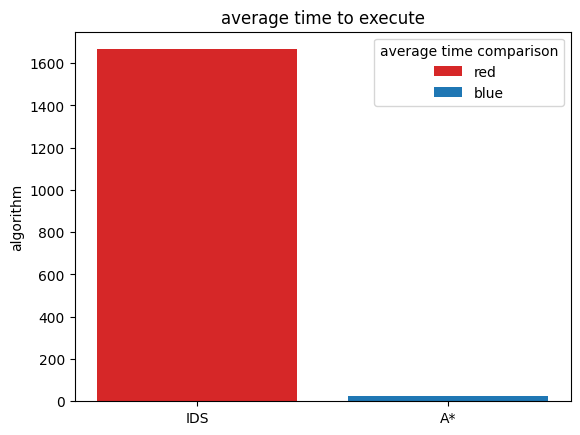

In [55]:
fig, ax = plt.subplots()
algorithm = ['IDS', 'A*']
time = [IDS_ypoints.sum()/5, A_star_ypoints.sum()/5]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(algorithm, time, label=bar_labels, color=bar_colors)

ax.set_ylabel('algorithm')
ax.set_title('average time to execute')
ax.legend(title='average time comparison')

plt.show()

# <font color='yellow'>as shown in the result the A* algorithm with the help pf the heuristic function has decent advantage over IDS so it expands less nodes so it is recommended to use the A* algorithm</font>